In [1]:
# 每行代表一个App，各字段之间由逗号分隔，顺序依次为：“appID，appCategory”。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
path = '~/codedata/tpai/pre/'

In [2]:
appcategory = pd.read_csv(path + 'app_categories.csv')
train = pd.read_csv(path + 'train.csv')
ad = pd.read_csv(path + 'ad.csv')
# appId在creativeID的标号内
train = pd.merge(train, ad, on='creativeID',how='left')
train = pd.merge(train,appcategory,on='appID',how='left')
train['plateform_category'] = train['appPlatform'] * 1000 + train['appCategory']
del ad
del appcategory
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,appCategory,plateform_category
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,10,434,1,108,1108
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,80,14,2,2,2002
2,0,170000,NaN,4465,1857485,7434,4,1,147,460,3,465,1,209,1209
3,0,170000,NaN,1004,2038823,977,1,1,411,564,3,465,1,209,1209
4,0,170000,NaN,1887,2015141,3688,1,1,369,144,84,360,1,201,1201


In [3]:
test = {}
def property(var, train):
    # 点击量的统计直方图     
    sns.distplot(train[var], kde=False)
    fig = plt.figure()
    count = train[var].value_counts()
    count_index = count.values < 5
    if count_index.any():
        train[var].replace(count[count_index].index, 10000, inplace=True)
    means = train.groupby(var)['label'].mean()
    # 根据var属性的每一个取值做均值     
    plt.scatter(x=means.index, y = means.values)
    sort_means = means.sort_values(ascending = False)
    fig = plt.figure()
    # 按顺序画散点图
    plt.scatter(x = range(0,len(sort_means)), y = sort_means.values)
    return (var, len(train[var].value_counts()), means.max() - means.min(), means.std())

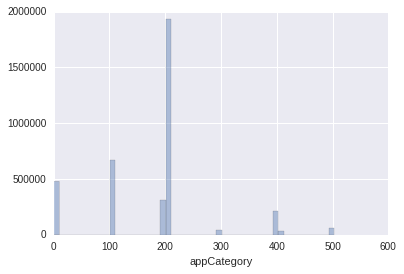

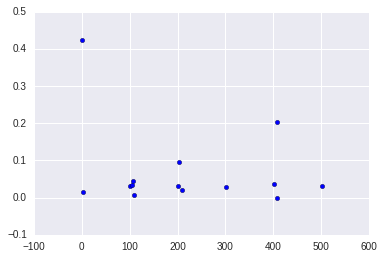

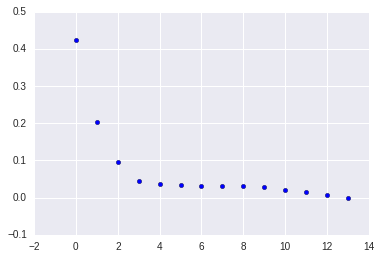

In [4]:
# appID其实只有app类别属性，应该可以被替代
var = 'appCategory'
# sns.distplot(train[var],kde=False)
# fig = plt.figure()
# means = train.groupby(var)['label'].mean()
# plt.xlim(0,600)
# plt.scatter(x=means.index, y=means.values)
# print type(means)
# means.sort_values(ascending=False)
# sns.jointplot(x=means.index,y=means.values, xlim=(0,600), dropna=False)
# data = pd.concat([appcategory['appID'], appcategory['appCategory']], axis = 1)
# data.plot.scatter(x='appID', y='appCategory')
# 存在安卓、苹果、未知
test[var] = property(var, train)

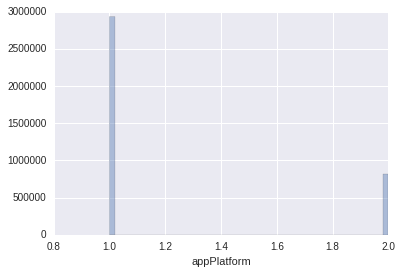

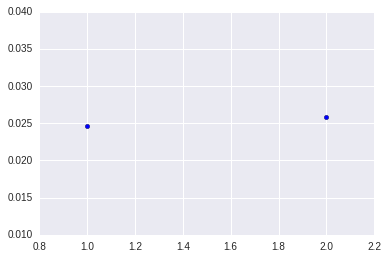

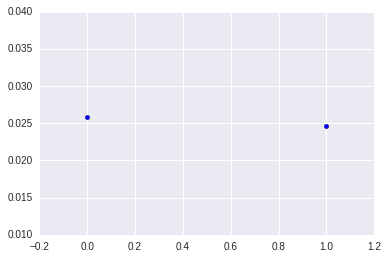

In [5]:
# appID其实只有app类别属性，应该可以被替代
var = 'appPlatform'
test[var] = property(var, train)
# sns.distplot(train[var],kde=False)
# fig = plt.figure()
# means = train.groupby(var)['label'].mean()
# plt.xlim(0,600)
# plt.scatter(x=means.index, y=means.values)
# print type(means)
# means.sort_values(ascending=False)
# sns.jointplot(x=means.index,y=means.values, xlim=(0,600), dropna=False)
# data = pd.concat([appcategory['appID'], appcategory['appCategory']], axis = 1)
# data.plot.scatter(x='appID', y='appCategory')

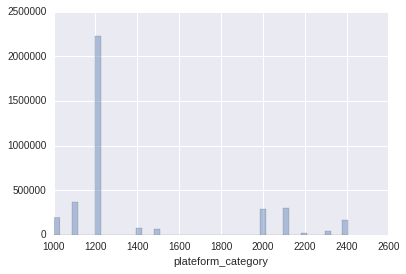

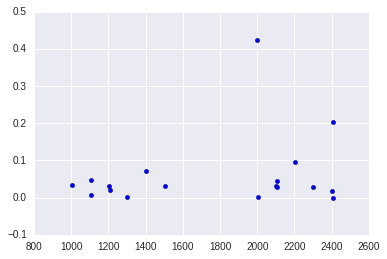

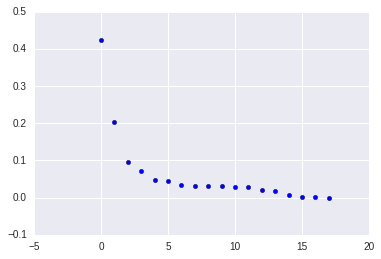

In [6]:
var = 'plateform_category'
test[var] = property(var, train)

In [7]:
for (k,v) in test.items():
    print v

('plateform_category', 18, 0.42384105960264901, 0.10183784364878556)
('appCategory', 14, 0.42384105960264901, 0.11342039643011995)
('appPlatform', 2, 0.0012702159343590154, 0.0008981783007564663)


                       label  appCategory  appPlatform  plateform_category
label               1.000000     0.023145     0.003367            0.005109
appCategory         0.023145     1.000000    -0.277935            0.333590
appPlatform         0.003367    -0.277935     1.000000            0.692582
plateform_category  0.005109     0.333590     0.692582            1.000000


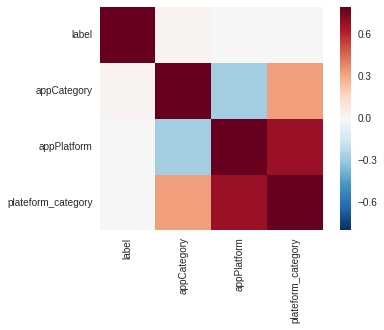

In [8]:
feats = ['label', 'appCategory', 'appPlatform','plateform_category']
# 默认的是线性相关性，即正相关或负相关
# corr = train[feats].corr()
corr = train[feats].corr('kendall')

fig = plt.figure()
print corr
sns.heatmap(corr, vmax=.8, square=True)